<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Code Library, Styling, and Links</h1>
<details><summary style='color:#37c9e1; font-family:Orbitron;'>Github</summary><br/>

The current notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-neural-networks.ipynb)

The previous notebook
    
&#x1F4D8; &nbsp; [Python Version](https://github.com/OlgaBelitskaya/kaggle_notebooks/blob/master/passnyc-regression-methods.ipynb)

<details><summary style='color:#37c9e1; font-family:Orbitron;'>Useful Links</summary><br/>

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)
    
&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)
    
&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

&#x1F4E1; &nbsp; [ggplot2](https://ggplot2.tidyverse.org/)

&#x1F4E1; &nbsp; [R Tutorial](https://www.tutorialspoint.com/r/index.htm)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto&effect=3d');
body {background-color: gainsboro;} 
h3 {color:#818286; font-family:Roboto;}
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}                
</style>

In [2]:
import warnings; warnings.filterwarnings("ignore")
import numpy as np,pandas as pd
import pylab as plt,seaborn as sns
import matplotlib.colors as mcolors
from descartes import PolygonPatch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import median_absolute_error,mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import explained_variance_score
from keras.models import Sequential,Model
from keras.optimizers import SGD,RMSprop
from keras.layers import Dense,Dropout,LSTM
from keras.layers import Activation,Flatten,Input,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D,Conv2D,MaxPooling2D
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
cmap=plt.cm.get_cmap('Spectral',4)
spectral_cmap=[]
for i in range(cmap.N):
    rgb=cmap(i)[:3]
    spectral_cmap.append(mcolors.rgb2hex(rgb))
plt.style.use('seaborn-whitegrid'); path='../input/'
fw='weights.passnyc.hdf5'

Using TensorFlow backend.


In [3]:
def scores(regressor,y_train,y_valid,y_test,
           y_train_reg,y_valid_reg,y_test_reg):
    print(20*"<=>"); print(regressor); print(20*"<=>")
    print("EV score. Train: ",
          explained_variance_score(y_train,y_train_reg))
    print("EV score. Valid: ",
          explained_variance_score(y_valid,y_valid_reg))
    print("EV score. Test: ",
          explained_variance_score(y_test,y_test_reg))
    print(20*"<=>")
    print("R2 score. Train: ",r2_score(y_train,y_train_reg))
    print("R2 score. Valid: ",r2_score(y_valid,y_valid_reg))
    print("R2 score. Test: ",r2_score(y_test,y_test_reg))
    print(20*"<=>")
    print("MSE score. Train: ",
          mean_squared_error(y_train,y_train_reg))
    print("MSE score. Valid: ",
          mean_squared_error(y_valid,y_valid_reg))
    print("MSE score. Test: ",
          mean_squared_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MAE score. Train: ",
          mean_absolute_error(y_train,y_train_reg))
    print("MAE score. Valid: ",
          mean_absolute_error(y_valid,y_valid_reg))
    print("MAE score. Test: ",
          mean_absolute_error(y_test,y_test_reg))
    print(20*"<=>")
    print("MdAE score. Train: ",
          median_absolute_error(y_train,y_train_reg))
    print("MdAE score. Valid: ",
          median_absolute_error(y_valid,y_valid_reg))
    print("MdAE score. Test: ",
          median_absolute_error(y_test,y_test_reg))
def history_plot(fit_history,n):
    keys=list(fit_history.history.keys())[0:4]
    plt.figure(figsize=(11,10)); plt.subplot(211)
    plt.plot(fit_history.history[keys[0]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[2]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("Loss")
    plt.legend(); plt.title('Loss Function')    
    plt.subplot(212)
    plt.plot(fit_history.history[keys[1]][n:],
             color='slategray',label='train')
    plt.plot(fit_history.history[keys[3]][n:],
             color='#37c9e1',label='valid')
    plt.xlabel("Epochs"); plt.ylabel("MAE"); plt.legend()
    plt.title('Mean Absolute Error'); plt.show() 

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Data Loading and Preprocessing</h1>

In [4]:
school_explorer=pd.read_csv(path+'2016 School Explorer.csv')
d5_shsat=pd.read_csv(path+'D5 SHSAT Registrations and Testers.csv')
school_explorer.shape,d5_shsat.shape

((1272, 161), (140, 7))

In [5]:
drop_list=['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer=school_explorer.drop(drop_list,axis=1)
school_explorer.loc[[427,1023,712,908],'School Name']=\
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype('object') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate']=\
    school_explorer['School Income Estimate'].str.replace(s,"")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].str.replace("nan","0")
school_explorer['School Income Estimate']=\
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0,np.NaN,inplace=True)
percent_list=['Percent ELL','Percent Asian','Percent Black',
              'Percent Hispanic','Percent Black / Hispanic',
              'Percent White','Student Attendance Rate',
              'Percent of Students Chronically Absent',
              'Rigorous Instruction %','Collaborative Teachers %',
              'Supportive Environment %','Effective School Leadership %',
              'Strong Family-Community Ties %','Trust %']
target_list=['Average ELA Proficiency','Average Math Proficiency']
economic_list=['Economic Need Index','School Income Estimate']
rating_list=['Rigorous Instruction Rating','Collaborative Teachers Rating',
             'Supportive Environment Rating','Effective School Leadership Rating',
             'Strong Family-Community Ties Rating','Trust Rating',
             'Student Achievement Rating']
for el in percent_list:
    school_explorer[el]=school_explorer[el].astype('object')
    school_explorer[el]=school_explorer[el].str.replace("%","")
    school_explorer[el]=school_explorer[el].str.replace("nan","0")
    school_explorer[el]=school_explorer[el].astype(float)
    school_explorer[el].replace(0,np.NaN,inplace=True)
    school_explorer[el]=school_explorer[el].interpolate()
for el in target_list+economic_list:
    school_explorer[el]=school_explorer[el].interpolate()
for el in rating_list:
    moda_value=school_explorer[el].value_counts().idxmax()
    school_explorer[el]=school_explorer[el].fillna(moda_value)    
category_list=['District','Community School?','City','Grades']               
for feature in category_list:
    feature_cat=pd.factorize(school_explorer[feature])
    school_explorer[feature]=feature_cat[0]    
for feature in rating_list:
    feature_pairs=dict(zip(['Not Meeting Target','Meeting Target', 
                            'Approaching Target','Exceeding Target'],
                            ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature]=school_explorer[feature].astype(int)    
category_list=list(category_list+rating_list)
numeric_list=list(school_explorer\
.columns[[4,5]+list(range(13,24))+[25,27,29,31,33]+list(range(38,158))])    
print('Number of Missing Values: ',sum(school_explorer.isna().sum())) 

Number of Missing Values:  0


In [6]:
sat_list=['DBN','Number of students who registered for the SHSAT',
          'Number of students who took the SHSAT']
d5_shsat_2016=d5_shsat[sat_list][d5_shsat['Year of SHST']==2016]\
.groupby(['DBN'],as_index=False).agg(np.sum)
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Number of students who took the SHSAT']\
/d5_shsat_2016['Number of students who registered for the SHSAT']
d5_shsat_2016['Took SHSAT %']=\
d5_shsat_2016['Took SHSAT %'].fillna(0).apply(lambda x:round(x,3))
d5_shsat_2016.rename(columns={'DBN':'Location Code'},inplace=True)
d5_shsat_2016=\
pd.merge(school_explorer[['Location Code']+numeric_list+\
                         category_list+target_list],
         d5_shsat_2016,on='Location Code')
d5_shsat_2016.shape

(21, 155)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'>  &#x1F310; &nbsp; Data Splitting for Neural Networks</h1>
The predictions of economic indicators for schools are based on the data about social environment, ethnic composition and educational results.

### The first set of features and targets

In [7]:
features1=school_explorer[numeric_list+target_list]\
.drop(economic_list,axis=1).values
targets1=school_explorer['Economic Need Index'].values
X_train1,X_test1,y_train1,y_test1=\
train_test_split(features1,targets1,test_size=.2,random_state=1)
n=int(len(X_test1)/2)
X_valid1,y_valid1=X_test1[:n],y_test1[:n]
X_test1,y_test1=X_test1[n:],y_test1[n:]
# data = school_explorer
# features = numeric variables + target_list - economic_list
# targets = Economic Need Index
[X_train1.shape,X_test1.shape,X_valid1.shape,
y_train1.shape,y_test1.shape,y_valid1.shape]

[(1017, 138), (128, 138), (127, 138), (1017,), (128,), (127,)]

### The second set of features and targets

In [8]:
features2=school_explorer[numeric_list+target_list]\
.drop(economic_list, axis=1).values
targets2=school_explorer['School Income Estimate'].values
X_train2,X_test2,y_train2,y_test2=\
train_test_split(features2,targets2,test_size=.2,random_state=1)
n=int(len(X_test2)/2)
X_valid2,y_valid2=X_test2[:n],y_test2[:n]
X_test2,y_test2=X_test2[n:],y_test2[n:]
scale_y2=RobustScaler()
y_train2=scale_y2.fit_transform(y_train2.reshape(-1,1))
y_valid2=scale_y2.transform(y_valid2.reshape(-1,1))
y_test2=scale_y2.transform(y_test2.reshape(-1,1))
# data = school_explorer
# features = numeric variables + target_list - economic_list 
# targets = School Income Estimate
[X_train2.shape,X_test2.shape,X_valid2.shape,
y_train2.shape,y_test2.shape,y_valid2.shape]

[(1017, 138), (128, 138), (127, 138), (1017, 1), (128, 1), (127, 1)]

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Neural Network Regressors</h1>

### MLP => The first set of features and targets

In [9]:
def mlp_model1():
    model=Sequential()    
    model.add(Dense(138,input_dim=138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138))
    model.add(LeakyReLU(alpha=.02))   
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))    
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model1=mlp_model1()

In [10]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model1.fit(X_train1,y_train1,
                       epochs=100,batch_size=16,verbose=2,
                       validation_data=(X_valid1,y_valid1),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 5s - loss: 3916.0051 - mean_absolute_error: 10.6050 - val_loss: 15.6391 - val_mean_absolute_error: 3.6048

Epoch 00001: val_loss improved from inf to 15.63914, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 11s - loss: 2.3906 - mean_absolute_error: 0.9434 - val_loss: 0.0609 - val_mean_absolute_error: 0.1892

Epoch 00002: val_loss improved from 15.63914 to 0.06091, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 13s - loss: 0.5837 - mean_absolute_error: 0.5190 - val_loss: 0.2008 - val_mean_absolute_error: 0.2601

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 8s - loss: 0.1996 - mean_absolute_error: 0.2958 - val_loss: 0.1129 - val_mean_absolute_error: 0.2425

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 4s - loss: 0.1097 - mean_absolute_error: 0.2492 - val_loss: 17.4052 - val_mean_absolute_error: 0.8498

Epoch 00005: val_loss did not improve
Epoch 6/100
 - 4s - loss: 0.0904 - mean_absolute_error: 0.2204

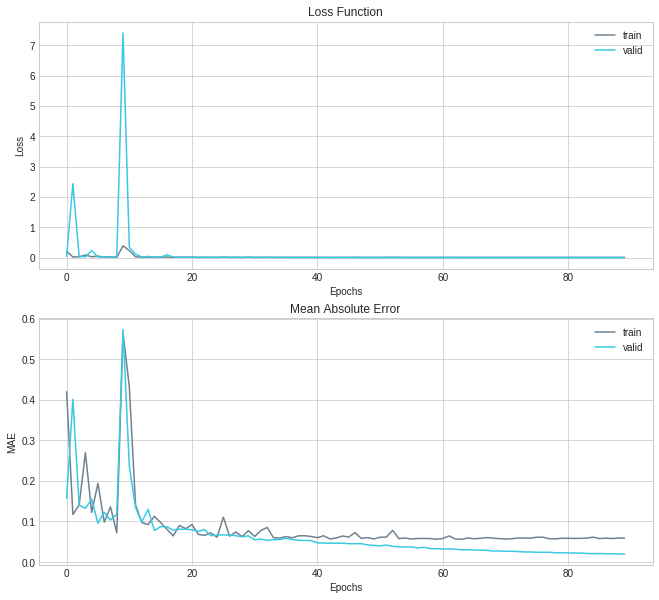

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.9739611769096984
EV score. Valid:  0.8885127040942836
EV score. Test:  0.8567742720773144
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9738009984268643
R2 score. Valid:  0.8878410498951484
R2 score. Test:  0.8446119947656567
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.0011061625570424798
MSE score. Valid:  0.0054448648453170306
MSE score. Test:  0.008104654587139321
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.02373264816579019
MAE score. Valid:  0.05670363458967583
MAE score. Test:  0.06456927577289752
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.016814489841461167
MdAE score. Valid:  0.04600303411483764
MdAE score. Test:  0.04779578506946559


In [11]:
history_plot(history,10)
mlp_model1.load_weights(fw)
y_train_mlp1=mlp_model1.predict(X_train1)
y_valid_mlp1=mlp_model1.predict(X_valid1)
y_test_mlp1=mlp_model1.predict(X_test1)
scores('MLP; Economic Need Index',y_train1,y_valid1,y_test1,
       y_train_mlp1,y_valid_mlp1,y_test_mlp1)

### MLP => The second set of features and targets

In [12]:
def mlp_model2():
    model=Sequential()    
    model.add(Dense(138,input_dim=138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dense(138*16))
    model.add(LeakyReLU(alpha=.02))   
    model.add(Dense(1))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
mlp_model2=mlp_model2()

In [13]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=mlp_model2.fit(X_train2,y_train2, 
                       epochs=100,batch_size=16,verbose=2,
                       validation_data=(X_valid2,y_valid2),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 5s - loss: 8047.6274 - mean_absolute_error: 14.3859 - val_loss: 5.7823 - val_mean_absolute_error: 1.5512

Epoch 00001: val_loss improved from inf to 5.78231, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 4s - loss: 8.0155 - mean_absolute_error: 1.5880 - val_loss: 3.3120 - val_mean_absolute_error: 1.5118

Epoch 00002: val_loss improved from 5.78231 to 3.31198, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 4s - loss: 2.7084 - mean_absolute_error: 1.0886 - val_loss: 0.8469 - val_mean_absolute_error: 0.6659

Epoch 00003: val_loss improved from 3.31198 to 0.84689, saving model to weights.passnyc.hdf5
Epoch 4/100
 - 4s - loss: 0.6989 - mean_absolute_error: 0.6309 - val_loss: 0.4121 - val_mean_absolute_error: 0.5385

Epoch 00004: val_loss improved from 0.84689 to 0.41212, saving model to weights.passnyc.hdf5
Epoch 5/100
 - 4s - loss: 0.5408 - mean_absolute_error: 0.5480 - val_loss: 0.3395 - val_mean_absolute_error: 0.41

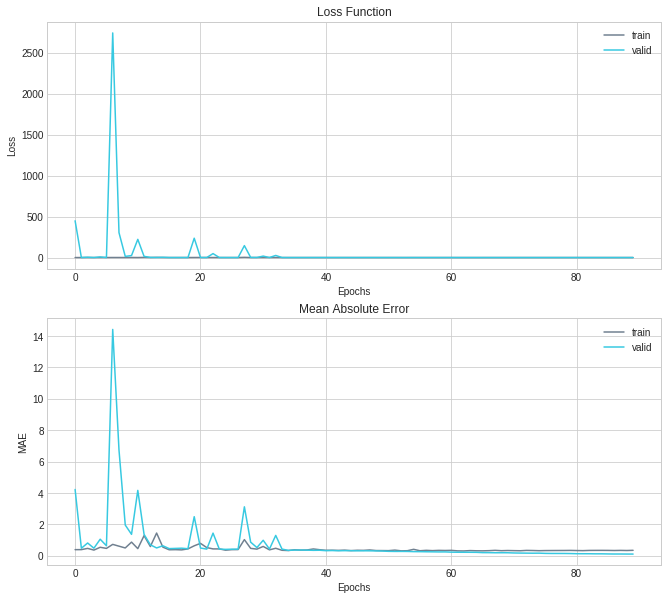

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MLP; School Income Estimate
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.7970129973008981
EV score. Valid:  0.7142238176936513
EV score. Test:  0.6373390632328968
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.7968431543221715
R2 score. Valid:  0.7087371859716893
R2 score. Test:  0.6369347398900014
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.14705071143063056
MSE score. Valid:  0.19056832888497593
MSE score. Test:  0.406204558739483
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.2882026068810871
MAE score. Valid:  0.332299962185559
MAE score. Test:  0.42036851913635886
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.23382443265121666
MdAE score. Valid:  0.2445870883798631
MdAE score. Test:  0.3032127137173858


In [14]:
history_plot(history,10)
mlp_model2.load_weights(fw)
y_train_mlp2=mlp_model2.predict(X_train2)
y_valid_mlp2=mlp_model2.predict(X_valid2)
y_test_mlp2=mlp_model2.predict(X_test2)
scores('MLP; School Income Estimate',y_train2,y_valid2,y_test2,
       y_train_mlp2,y_valid_mlp2,y_test_mlp2)

### CNN => The first set of features and targets

In [15]:
def cnn_model1():
    model=Sequential()        
    model.add(Conv1D(138,3,padding='valid',
                     input_shape=(138,1)))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))
    model.add(Conv1D(138*4,3,padding='valid'))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))    
    model.add(Flatten())
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.5))
    model.add(Dense(1, kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
cnn_model1=cnn_model1()

In [16]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=cnn_model1.fit(X_train1.reshape(-1,138,1),y_train1, 
                              epochs=100,batch_size=16,verbose=2,
                              validation_data=(X_valid1.reshape(-1,138,1),y_valid1),
                              callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 18s - loss: 16592.7635 - mean_absolute_error: 31.6082 - val_loss: 87.0809 - val_mean_absolute_error: 6.2288

Epoch 00001: val_loss improved from inf to 87.08088, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 17s - loss: 74.0754 - mean_absolute_error: 5.6562 - val_loss: 8.3690 - val_mean_absolute_error: 2.0958

Epoch 00002: val_loss improved from 87.08088 to 8.36898, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 18s - loss: 51.8159 - mean_absolute_error: 3.5753 - val_loss: 32.1165 - val_mean_absolute_error: 2.8798

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 17s - loss: 25.3424 - mean_absolute_error: 2.6681 - val_loss: 19.1402 - val_mean_absolute_error: 1.8681

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 17s - loss: 35.1467 - mean_absolute_error: 2.4212 - val_loss: 6.6602 - val_mean_absolute_error: 2.2354

Epoch 00005: val_loss improved from 8.36898 to 6.66024, saving model to weights.passnyc.hdf

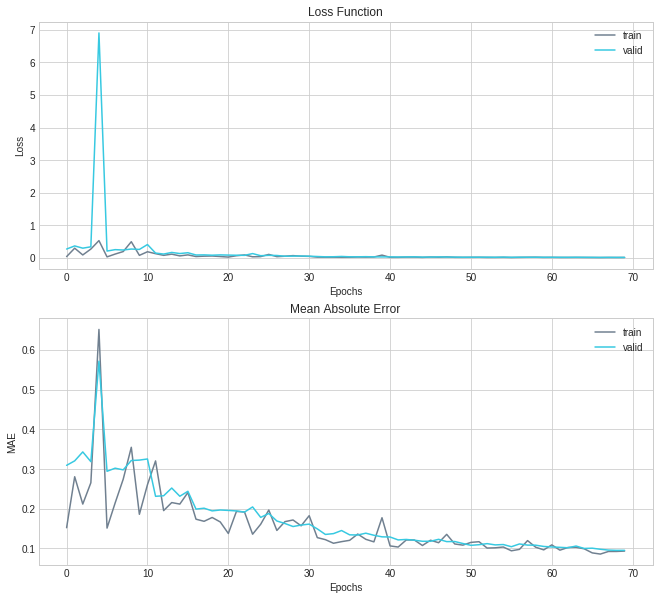

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
CNN; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.7856013778528319
EV score. Valid:  0.777006100185087
EV score. Test:  0.7924367199814585
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.7827355445131596
R2 score. Valid:  0.7763964340965333
R2 score. Test:  0.7846136465970347
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.00917324291785983
MSE score. Valid:  0.010855051639990803
MSE score. Test:  0.011234020248100472
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.07696971766626354
MAE score. Valid:  0.08592023282116792
MAE score. Test:  0.08630599244730547
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.06846847295761105
MdAE score. Valid:  0.0753530898094178
MdAE score. Test:  0.0705339632034302


In [17]:
history_plot(history,30)
cnn_model1.load_weights(fw)
y_train_cnn1=cnn_model1.predict(X_train1.reshape(-1,138,1))
y_valid_cnn1=cnn_model1.predict(X_valid1.reshape(-1,138,1))
y_test_cnn1=cnn_model1.predict(X_test1.reshape(-1,138,1))
scores('CNN; Economic Need Index',y_train1,y_valid1,y_test1,
       y_train_cnn1,y_valid_cnn1,y_test_cnn1)

### CNN => The second set of features and targets

In [18]:
def cnn_model2():
    model=Sequential()
    model.add(Conv1D(138,3,padding='valid',
                     input_shape=(138,1)))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))
    model.add(Conv1D(138*4,3,padding='valid'))
    model.add(LeakyReLU(alpha=.02))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(.25))   
    model.add(Flatten())
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.5))
    model.add(Dense(1,kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',
                  metrics=['mae'])
    return model
cnn_model2=cnn_model2()

In [19]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=cnn_model2.fit(X_train2.reshape(-1,138,1),y_train2, 
                              epochs=100,batch_size=64,verbose=2,
                              validation_data=(X_valid2.reshape(-1,138,1),y_valid2),
                              callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 8s - loss: 208841.6733 - mean_absolute_error: 120.7246 - val_loss: 353.6704 - val_mean_absolute_error: 10.6389

Epoch 00001: val_loss improved from inf to 353.67036, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 7s - loss: 471.8328 - mean_absolute_error: 13.9307 - val_loss: 110.6032 - val_mean_absolute_error: 5.3253

Epoch 00002: val_loss improved from 353.67036 to 110.60321, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 7s - loss: 601.8552 - mean_absolute_error: 16.6019 - val_loss: 396.6893 - val_mean_absolute_error: 13.8613

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 7s - loss: 265.9088 - mean_absolute_error: 11.4161 - val_loss: 17.4864 - val_mean_absolute_error: 2.8498

Epoch 00004: val_loss improved from 110.60321 to 17.48643, saving model to weights.passnyc.hdf5
Epoch 5/100
 - 7s - loss: 222.5553 - mean_absolute_error: 9.6906 - val_loss: 118.7690 - val_mean_absolute_error: 9.3132

Epoch 00005: val_

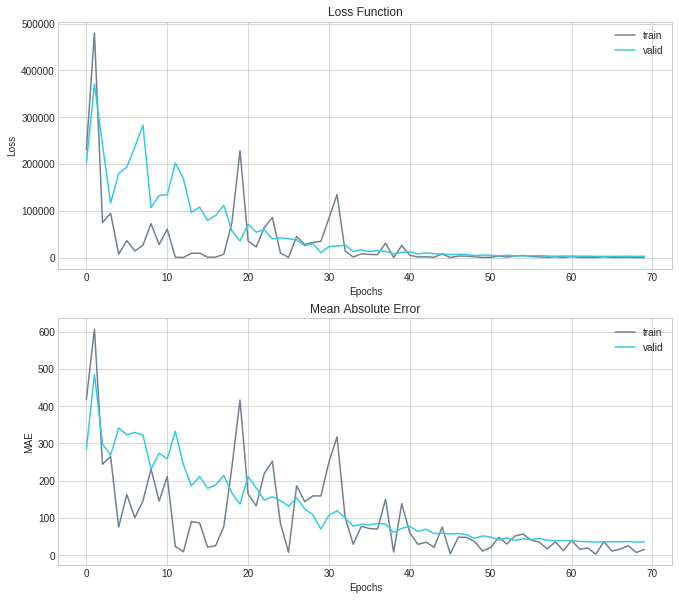

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
CNN; School Income Estimate
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  -2.125515464340006
EV score. Valid:  -2.2616947539231416
EV score. Test:  -1.1953451422036263
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  -3.5336992458840353
R2 score. Valid:  -3.973782858447418
R2 score. Test:  -1.7974087808782935
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  3.281620647807286
MSE score. Valid:  3.2542619308722776
MSE score. Test:  3.129796001706
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  1.2423848104653523
MAE score. Valid:  1.2483028465676318
MAE score. Test:  1.2198526140012205
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.942776139469382
MdAE score. Valid:  0.9488608943250199
MdAE score. Test:  0.8673659090370505


In [20]:
history_plot(history,30)
cnn_model2.load_weights(fw)
y_train_cnn2=cnn_model2.predict(X_train2.reshape(-1,138,1))
y_valid_cnn2=cnn_model2.predict(X_valid2.reshape(-1,138,1))
y_test_cnn2=cnn_model2.predict(X_test2.reshape(-1,138,1))
scores('CNN; School Income Estimate',y_train2,y_valid2,y_test2,
       y_train_cnn2,y_valid_cnn2,y_test_cnn2)

### RNN => The first set of features and targets

In [21]:
def rnn_model1():
    model=Sequential()    
    model.add(LSTM(138,return_sequences=True,
                   input_shape=(1,138)))
    model.add(LSTM(138*4,return_sequences=False))     
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.1))    
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',
                  metrics=['mae'])     
    return model 
rnn_model1=rnn_model1()

In [22]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=rnn_model1.fit(X_train1.reshape(-1,1,138),y_train1, 
                       epochs=100,batch_size=16,verbose=2,
                       validation_data=(X_valid1.reshape(-1,1,138),y_valid1),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 5s - loss: 0.0451 - mean_absolute_error: 0.1574 - val_loss: 0.0265 - val_mean_absolute_error: 0.1357

Epoch 00001: val_loss improved from inf to 0.02646, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 3s - loss: 0.0245 - mean_absolute_error: 0.1243 - val_loss: 0.0170 - val_mean_absolute_error: 0.1044

Epoch 00002: val_loss improved from 0.02646 to 0.01697, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 3s - loss: 0.0185 - mean_absolute_error: 0.1095 - val_loss: 0.0132 - val_mean_absolute_error: 0.0922

Epoch 00003: val_loss improved from 0.01697 to 0.01319, saving model to weights.passnyc.hdf5
Epoch 4/100
 - 3s - loss: 0.0160 - mean_absolute_error: 0.1012 - val_loss: 0.0256 - val_mean_absolute_error: 0.1321

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 3s - loss: 0.0148 - mean_absolute_error: 0.0962 - val_loss: 0.0282 - val_mean_absolute_error: 0.1414

Epoch 00005: val_loss did not improve
Epoch 6/100
 - 3s

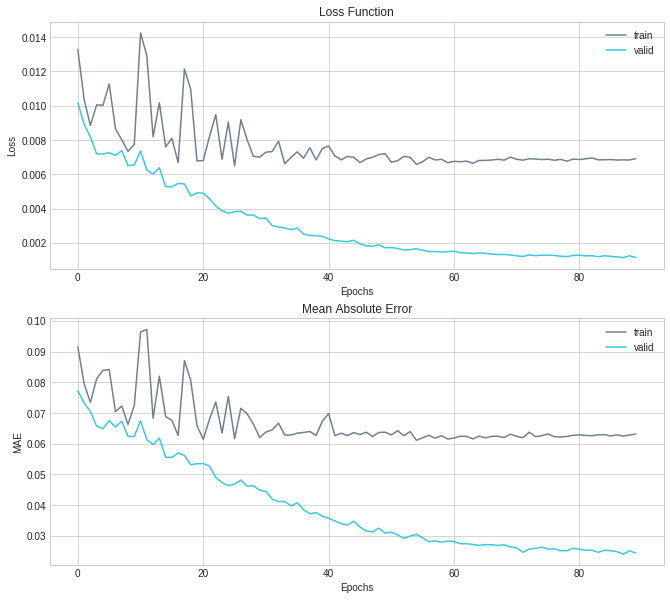

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
RNN; Economic Need Index
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.929330671384227
EV score. Valid:  0.8662582823045122
EV score. Test:  0.8398505436189417
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.9292122319195318
R2 score. Valid:  0.8661703197065842
R2 score. Test:  0.8393302165266914
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.002988769565459776
MSE score. Valid:  0.0064968914278212084
MSE score. Test:  0.00838013909553574
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.04103718743473535
MAE score. Valid:  0.061668850488550066
MAE score. Test:  0.06898982296139002
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.03230488109588625
MdAE score. Valid:  0.042524976253509594
MdAE score. Test:  0.05131132721900936


In [23]:
history_plot(history,10)
rnn_model1.load_weights(fw)
y_train_rnn1=rnn_model1.predict(X_train1.reshape(-1,1,138))
y_valid_rnn1=rnn_model1.predict(X_valid1.reshape(-1,1,138))
y_test_rnn1=rnn_model1.predict(X_test1.reshape(-1,1,138))
scores('RNN; Economic Need Index',y_train1,y_valid1,y_test1,
       y_train_rnn1,y_valid_rnn1,y_test_rnn1)

### RNN => The second set of features and targets

In [24]:
def rnn_model2():
    model=Sequential()   
    model.add(LSTM(138,return_sequences=True,
                   input_shape=(1,138)))
    model.add(LSTM(138*4,return_sequences=False))     
    model.add(Dense(138*8,kernel_initializer='normal'))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.1))    
    model.add(Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',
                  metrics=['mae'])     
    return model 
rnn_model2=rnn_model2()

In [25]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.75)
history=rnn_model2.fit(X_train2.reshape(-1,1,138),y_train2, 
                       epochs=100,batch_size=16,verbose=2,
                       validation_data=(X_valid2.reshape(-1,1,138),y_valid2),
                       callbacks=[checkpointer,lr_reduction])

Train on 1017 samples, validate on 127 samples
Epoch 1/100
 - 10s - loss: 0.4384 - mean_absolute_error: 0.4910 - val_loss: 0.3428 - val_mean_absolute_error: 0.4295

Epoch 00001: val_loss improved from inf to 0.34280, saving model to weights.passnyc.hdf5
Epoch 2/100
 - 8s - loss: 0.3676 - mean_absolute_error: 0.4492 - val_loss: 0.2678 - val_mean_absolute_error: 0.4216

Epoch 00002: val_loss improved from 0.34280 to 0.26779, saving model to weights.passnyc.hdf5
Epoch 3/100
 - 4s - loss: 0.3523 - mean_absolute_error: 0.4308 - val_loss: 0.2805 - val_mean_absolute_error: 0.3896

Epoch 00003: val_loss did not improve
Epoch 4/100
 - 3s - loss: 0.3325 - mean_absolute_error: 0.4238 - val_loss: 0.2767 - val_mean_absolute_error: 0.4079

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 3s - loss: 0.3188 - mean_absolute_error: 0.4134 - val_loss: 0.2814 - val_mean_absolute_error: 0.4179

Epoch 00005: val_loss did not improve
Epoch 6/100
 - 3s - loss: 0.2970 - mean_absolute_error: 0.4014 - val_lo

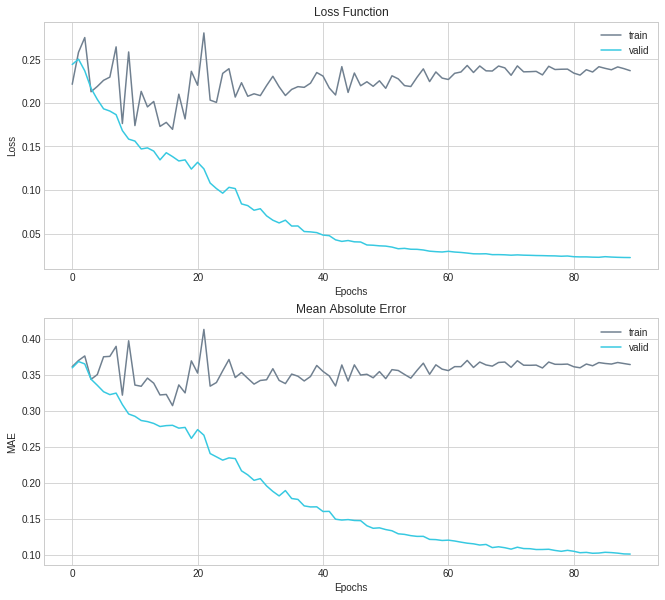

<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
RNN; School Income Estimate
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
EV score. Train:  0.8417753716420391
EV score. Valid:  0.7409616785034572
EV score. Test:  0.5905628394939282
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
R2 score. Train:  0.8363684534467872
R2 score. Valid:  0.7408950616572608
R2 score. Test:  0.5804406443819715
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MSE score. Train:  0.11844117412269062
MSE score. Valid:  0.169527975174411
MSE score. Test:  0.469411264691666
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MAE score. Train:  0.252900395853578
MAE score. Valid:  0.30694801678469946
MAE score. Test:  0.4192216961657789
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
MdAE score. Train:  0.19382387113066296
MdAE score. Valid:  0.2251528910687003
MdAE score. Test:  0.22498055448356888


In [26]:
history_plot(history,10)
rnn_model2.load_weights(fw)
y_train_rnn2=rnn_model2.predict(X_train2.reshape(-1,1,138))
y_valid_rnn2=rnn_model2.predict(X_valid2.reshape(-1,1,138))
y_test_rnn2=rnn_model2.predict(X_test2.reshape(-1,1,138))
scores('RNN; School Income Estimate',y_train2,y_valid2,y_test2,
       y_train_rnn2,y_valid_rnn2,y_test_rnn2)

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp; Display Predictions</h1>

### The first set of features and targets

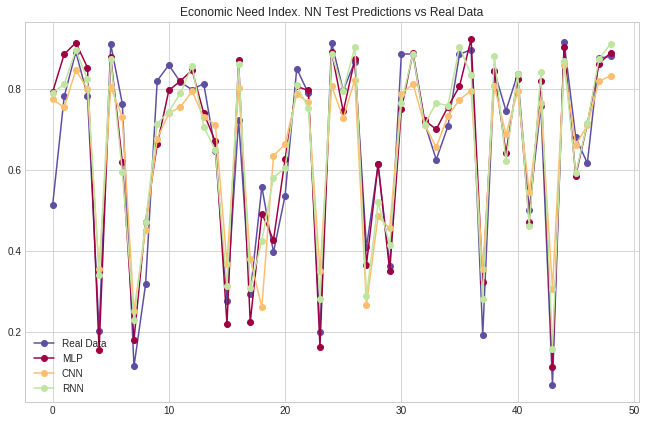

In [27]:
plt.figure(figsize=(11,7)); n=50
plt.plot(y_test1[1:n],'-o',
         color=spectral_cmap[3],label='Real Data')
plt.plot(y_test_mlp1[1:n],'-o',
         color=spectral_cmap[0],label='MLP')
plt.plot(y_test_cnn1[1:n],'-o',
         color=spectral_cmap[1],label='CNN')
plt.plot(y_test_rnn1[1:n],'-o',
         color=spectral_cmap[2],label='RNN')
ti="Economic Need Index. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

### The second set of features and targets

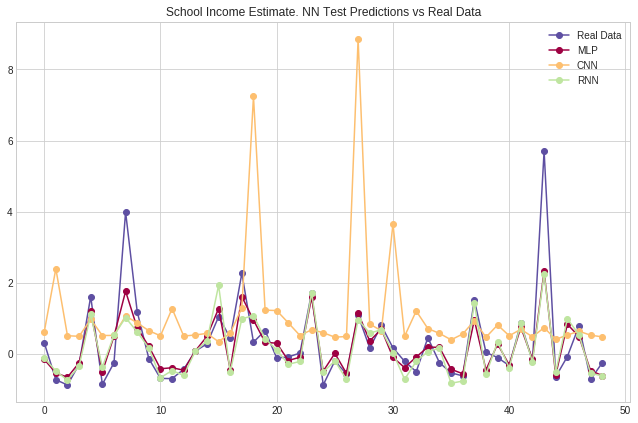

In [28]:
plt.figure(figsize=(11,7))
plt.plot(y_test2[1:n],'-o',
         color=spectral_cmap[3],label='Real Data')
plt.plot(y_test_mlp2[1:n],'-o',
         color=spectral_cmap[0],label='MLP')
plt.plot(y_test_cnn2[1:n],'-o',
         color=spectral_cmap[1],label='CNN')
plt.plot(y_test_rnn2[1:n],'-o',
         color=spectral_cmap[2],label='RNN')
ti="School Income Estimate. NN Test Predictions vs Real Data"
plt.legend(); plt.title(ti);

<h1 class='font-effect-3d' style='color:#37c9e1; font-family:Orbitron;'> &#x1F310; &nbsp;  Let's Go Ahead</h1>

The results obtained could be a base for several generalizing assumptions:

1) Neural networks such as a multilayer perceptron (MLP) and a recurrent neural network (RNN) better than a convolutional neural network (CNN) cope with the prediction of regression in the presence of mixed data (financial, sociological, etc.)

2) Characteristics of the educational process and results, social environment, ethnic composition, administrative affiliation are sufficient to predict the level of the indicator "Economic Need Index".

3) The same variables are not enough for predicting "School Income Estimate". The information must be supplemented with indicators of economic activity in general for the state and the economic situation in the district adjacent to the school.

It' s time to move to the next step.

&#x1F4D8; &nbsp; [PASSNYC. Neural Networks 2](https://www.kaggle.com/olgabelitskaya/passnyc-neural-networks-2)